In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
dcm_data = np.load('/content/drive/MyDrive/Colab Notebooks/dcm_data.npy')
label_data = np.load('/content/drive/MyDrive/Colab Notebooks/label_data.npy')

<function matplotlib.pyplot.show>

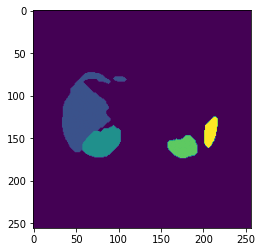

In [ ]:
img = label_data[20]
plt.imshow(img)
plt.show

In [ ]:
def liver(label_image):
    label_image = label_image/63
    label_image[label_image!=1] = 0
    label_image = tf.cast(label_image, tf.uint8)
    return label_image
def Rkidney(label_image):
    label_image = label_image/126
    label_image[label_image!=1] = 0
    label_image = tf.cast(label_image, tf.uint8)
    return label_image
def Lkidney(label_image):
    label_image = label_image/189
    label_image[label_image!=1] = 0
    label_image = tf.cast(label_image, tf.uint8)
    return label_image
def Spleen(label_image):
    label_image = label_image/252
    label_image[label_image!=1] = 0
    label_image = tf.cast(label_image, tf.uint8)
    return label_image
def reshape(X):
    X = X.reshape(list(X.shape) + [1]) 
    return X

In [ ]:
x_data = dcm_data/255
rklab_data = Rkidney(label_data)
lklab_data = Lkidney(label_data)
slab_data = Spleen(label_data)
print(x_data.shape, lklab_data.shape)

(623, 256, 256) (623, 256, 256)


In [ ]:
llab_data = liver(label_data)

In [ ]:
x_data = tf.cast(x_data, np.float32)
rklab_data = tf.cast(rklab_data, np.uint8)
lklab_data = tf.cast(lklab_data, np.uint8)
slab_data = tf.cast(slab_data, np.uint8)
x_data = x_data[..., None]
rklab_data = rklab_data[..., None]
lklab_data = lklab_data[..., None]
slab_data = slab_data[..., None]


In [ ]:
llab_data = tf.cast(llab_data, np.uint8)
llab_data = llab_data[..., None]

In [ ]:
print(x_data.shape, rklab_data.shape)

(623, 256, 256, 1) (623, 256, 256, 1)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
# ...     x_data, rklab_data, test_size=0.2, random_state=42)
x_train = x_data[0:498,:,:,:]
x_test = x_data[498:623,:,:,:]
rklab_train = rklab_data[0:498,:,:,:]
lklab_train = lklab_data[0:498,:,:,:]
slab_train = slab_data[0:498,:,:,:]
rklab_test = rklab_data[498:623,:,:,:]
lklab_test = lklab_data[498:623,:,:,:]
slab_test = slab_data[498:623,:,:,:]

In [ ]:
llab_train = llab_data[0:498,:,:,:]
llab_test = llab_data[498:623,:,:,:]
label_test = label_data[498:623,:,:]

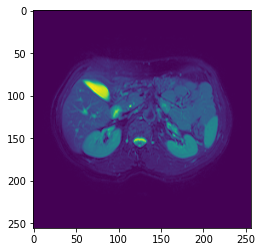

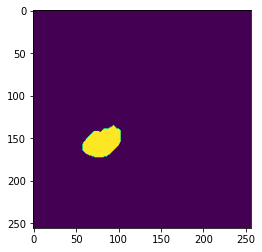

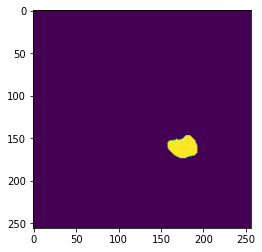

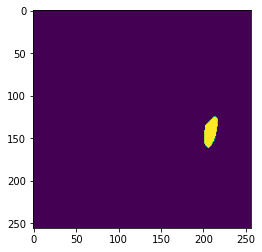

In [ ]:
#Check to make sure data has loaded in correctly
train_data_plot = tf.squeeze(x_train[20])
plt.imshow(train_data_plot)
plt.show()
train_label_plot1 = tf.squeeze(rklab_train[20])
plt.imshow(train_label_plot1)
plt.show()
train_label_plot2 = tf.squeeze(lklab_train[20])
plt.imshow(train_label_plot2)
plt.show()
train_label_plot3 = tf.squeeze(slab_train[20])
plt.imshow(train_label_plot3)
plt.show()

In [ ]:
class UNet(tf.keras.models.Model):
  def __init__(self):
    super().__init__()

    self.layer1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer2 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.layer3 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer4 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))
    self.layer5 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer6 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))
    self.layer7 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer8 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))
    self.layer9 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer10 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv1 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout1 = tf.keras.layers.Dropout(0.1) 
    self.layer11 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer12 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout2 = tf.keras.layers.Dropout(0.1)
    self.layer13 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer14 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv3 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout3 = tf.keras.layers.Dropout(0.1)
    self.layer15 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer16 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv4 = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same', activation = 'relu')
    self.dropout4 = tf.keras.layers.Dropout(0.1)
    self.layer17 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer18 = tf.keras.layers.Conv2D(filters=16,kernel_size=3, strides=1, padding='same', activation='relu') 
    self.layer19 = tf.keras.layers.Conv2D(filters=1, kernel_size=1, strides=1, padding='same', activation='sigmoid')#changed from linear to sigmoid 
  
  def call(self, input):  
    x1 = self.layer1(input)
    x2 = self.layer2(x1)
    p1 = self.pool1(x2)
    x3 = self.layer3(p1)
    x4 = self.layer4(x3)
    p2 = self.pool2(x4)
    x5 = self.layer5(p2)
    x6 = self.layer6(x5)
    p3 = self.pool3(x6)
    x7 = self.layer7(p3)
    x8 = self.layer8(x7)
    p4 = self.pool4(x8)
    x9 = self.layer9(p4)
    x10 = self.layer10(x9)
    t1 = self.transposeconv1(x10)
    s1 = tf.keras.layers.Concatenate(axis=-1)([t1, x8])
    d1 = self.dropout1(s1)
    x11 = self.layer11(d1)
    x12 = self.layer12(x11)
    t2 = self.transposeconv2(x12)
    s2 = tf.keras.layers.Concatenate(axis=-1)([t2, x6]) 
    d2 = self.dropout2(s2)
    x13 = self.layer13(d2)
    x14 = self.layer14(x13)
    t3 = self.transposeconv3(x14)
    s3 = tf.keras.layers.Concatenate(axis=-1)([t3, x4])
    d3 = self.dropout3(s3)
    x15 = self.layer15(d3)
    x16 = self.layer16(x15)
    t4 = self.transposeconv4(x16)
    s4 = tf.keras.layers.Concatenate(axis=-1)([t4, x2])
    d4 = self.dropout4(s4)
    x17 = self.layer17(d4)
    x18 = self.layer18(x17)
    x19 = self.layer19(x18)

    return self.layer19(x18)

model = UNet()

In [ ]:
model.compile(optimizer='adam',  # Optimizer
              loss='binary_crossentropy',  # Loss
                      metrics=[dice_metric])  # Metric to monitor

In [ ]:
def dice_metric(y_true, y_pred):


    threshold = 0.5

    mask = y_pred > threshold
    mask = tf.cast(mask, dtype=tf.float32)
    y_pred = tf.multiply(y_pred, mask)
    mask = y_true > threshold
    mask = tf.cast(mask, dtype=tf.float32)
    y_true = tf.multiply(y_true, mask)

    inse = tf.reduce_sum(tf.multiply(y_pred, y_true))
    l = tf.reduce_sum(y_pred)
    r = tf.reduce_sum(y_true)

    hard_dice = (2. * inse) / (l + r)
    mean_dice = tf.reduce_mean(hard_dice)
    #tf.debugging.check_numerics(mean_dice, 'NaN found', name=None)
    value_not_nan = tf.dtypes.cast(tf.math.logical_not(tf.math.is_nan(mean_dice)), dtype=tf.float32)
    mean_dice_no_nan = tf.math.multiply_no_nan(mean_dice, value_not_nan)
    return mean_dice_no_nan

In [ ]:
history = model.fit(
    x_train, rklab_train,
    validation_split = 0.2,
    batch_size=16,
    epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 95ms/step - loss: 0.0016 - dice_metric: 0.9139 - val_loss: 0.0040 - val_dice_metric: 0.5708
Epoch 2/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0017 - dice_metric: 0.9147 - val_loss: 0.0068 - val_dice_metric: 0.5499
Epoch 3/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0015 - dice_metric: 0.9181 - val_loss: 0.0043 - val_dice_metric: 0.5522
Epoch 4/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0015 - dice_metric: 0.9218 - val_loss: 0.0030 - val_dice_metric: 0.6043
Epoch 5/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0013 - dice_metric: 0.9298 - val_loss: 0.0039 - val_dice_metric: 0.5955
Epoch 6/50
25/25 [==============================] - 2s 92ms/step - loss: 0.0013 - dice_metric: 0.9289 - val_loss: 0.0040 - val_dice_metric: 0.5883
Epoch 7/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0013 - dice_metric: 0.9344 - val_loss: 0.00

In [ ]:
def display_learning_curves(history):
    #acc = history.history['acc']
    #val_acc = history.history['val_accuracy']
    dic = history.history['dice_metric']
    val_dic = history.history['val_dice_metric']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(50)

    fig = plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    # plt.plot(epochs_range, acc, label="train accuracy")
    # plt.plot(epochs_range, val_acc, label="validataion accuracy")
    plt.plot(epochs_range, dic, label="train accuracy")
    plt.plot(epochs_range, val_dic, label="validataion accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")


    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="train loss")
    plt.plot(epochs_range, val_loss, label="validataion loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

In [ ]:
# Predict on training images
rklab_pred = model.predict(x_test, verbose=1)

4/4 [==============================] - 1s 178ms/step


In [ ]:
rklab_pred.shape

(125, 256, 256, 1)

In [ ]:
# Use threshold to generate mask
thred = 0.5
rklab_mask = np.zeros(rklab_pred.shape)
rklab_mask[rklab_pred>thred] = 1
rklab_mask[rklab_pred<thred] = 0

In [ ]:
def plot_sample(x, y, mask,preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(x[ix, ..., 0], cmap='gray')
    ax[0].set_title('Original Image')

    ax[1].imshow(tf.squeeze(y)[ix])
    ax[1].set_title('Ground Truth Mask')

    ax[2].imshow(tf.squeeze(mask[ix]))
    ax[2].set_title('UNet Predicted Mask')

    ax[3].imshow(tf.squeeze(preds[ix]))
    ax[3].set_title('UNet Predicted Result')

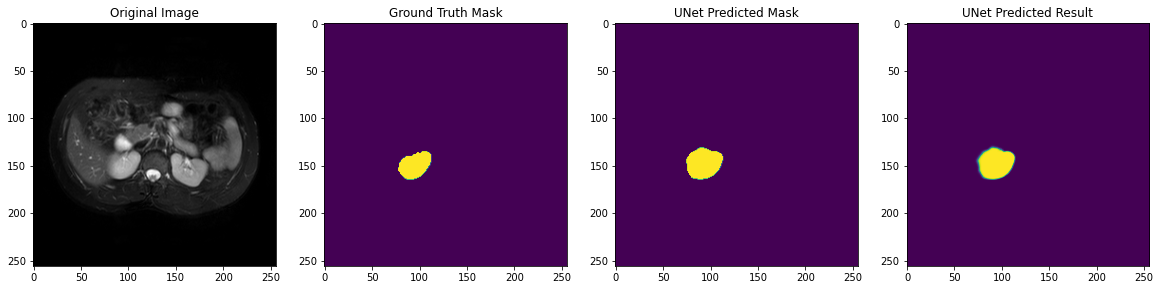

In [ ]:
# Look at data and output
plot_sample(x_test, rklab_test, rklab_mask , rklab_pred, ix=20)

In [ ]:
history2 = model.fit(
    x_train, lklab_train,
    validation_split = 0.2,
    batch_size=16,
    epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 95ms/step - loss: 0.1021 - dice_metric: 0.0063 - val_loss: 0.0287 - val_dice_metric: 0.0000e+00
Epoch 2/50
25/25 [==============================] - 2s 92ms/step - loss: 0.0191 - dice_metric: 0.0000e+00 - val_loss: 0.0147 - val_dice_metric: 0.0000e+00
Epoch 3/50
25/25 [==============================] - 2s 92ms/step - loss: 0.0140 - dice_metric: 0.0000e+00 - val_loss: 0.0097 - val_dice_metric: 0.0000e+00
Epoch 4/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0121 - dice_metric: 0.0000e+00 - val_loss: 0.0088 - val_dice_metric: 0.0000e+00
Epoch 5/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0106 - dice_metric: 0.0000e+00 - val_loss: 0.0091 - val_dice_metric: 0.0000e+00
Epoch 6/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0107 - dice_metric: 0.0000e+00 - val_loss: 0.0088 - val_dice_metric: 0.0000e+00
Epoch 7/50
25/25 [==============================] - 2s 93ms/step - loss: 0

In [ ]:
# Predict on training images
lklab_pred = model.predict(x_test, verbose=1)

4/4 [==============================] - 0s 50ms/step


In [ ]:
# Use threshold to generate mask
lklab_mask = np.zeros(lklab_pred.shape)
lklab_mask[lklab_pred>0.5] = 1
lklab_mask[lklab_pred<0.5] = 0

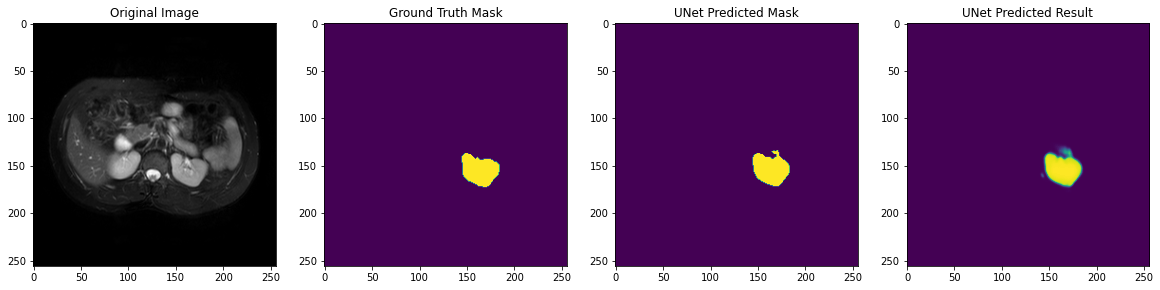

In [ ]:
# Look at data and output
plot_sample(x_test, lklab_test, lklab_mask , lklab_pred, ix=20)

In [ ]:
history3 = model.fit(
    x_train, slab_train,
    validation_split = 0.2,
    batch_size=16,
    epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 94ms/step - loss: 0.0373 - dice_metric: 0.0384 - val_loss: 0.0165 - val_dice_metric: 0.0000e+00
Epoch 2/50
25/25 [==============================] - 2s 92ms/step - loss: 0.0177 - dice_metric: 0.2134 - val_loss: 0.0122 - val_dice_metric: 0.2599
Epoch 3/50
25/25 [==============================] - 2s 92ms/step - loss: 0.0152 - dice_metric: 0.4548 - val_loss: 0.0140 - val_dice_metric: 0.2953
Epoch 4/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0133 - dice_metric: 0.5108 - val_loss: 0.0096 - val_dice_metric: 0.4161
Epoch 5/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0116 - dice_metric: 0.5967 - val_loss: 0.0160 - val_dice_metric: 0.4543
Epoch 6/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0087 - dice_metric: 0.7100 - val_loss: 0.0072 - val_dice_metric: 0.5080
Epoch 7/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0085 - dice_metric: 0.6965 - val_loss: 

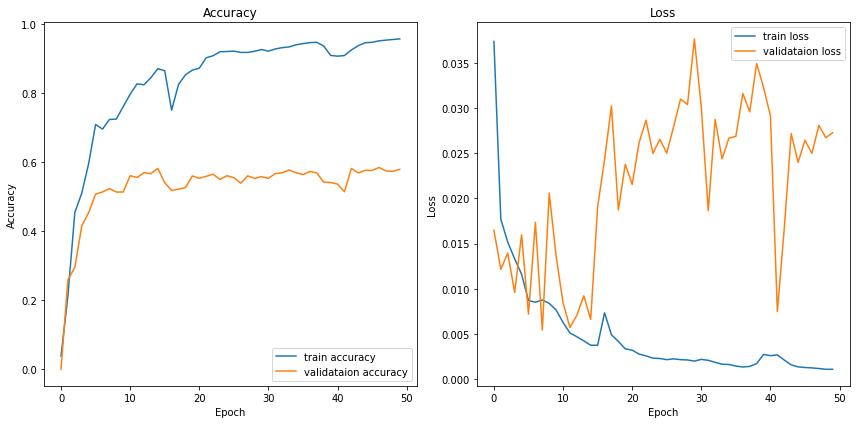

In [ ]:
# Display learning curves 
display_learning_curves(model.history)

In [ ]:
# Predict on training images
slab_pred = model.predict(x_test, verbose=1)

4/4 [==============================] - 0s 49ms/step


In [ ]:
# Use threshold to generate mask
slab_mask = np.zeros(slab_pred.shape)
slab_mask[slab_pred>thred] = 1
slab_mask[slab_pred<thred] = 0

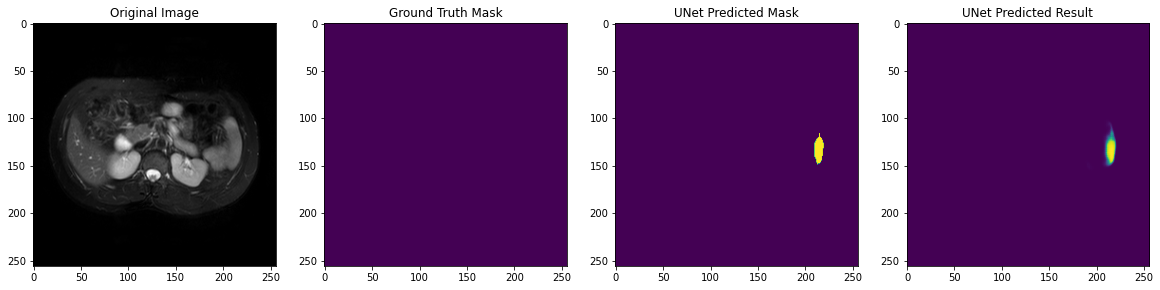

In [ ]:
# Look at data and output
plot_sample(x_test, slab_test, slab_mask , slab_pred, ix=20)

In [ ]:
history4 = model.fit(
    x_train, llab_train,
    validation_split = 0.2,
    batch_size=16,
    epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 95ms/step - loss: 0.3805 - dice_metric: 0.0225 - val_loss: 0.1092 - val_dice_metric: 0.0000e+00
Epoch 2/50
25/25 [==============================] - 2s 93ms/step - loss: 0.1195 - dice_metric: 0.0000e+00 - val_loss: 0.0742 - val_dice_metric: 0.0000e+00
Epoch 3/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0951 - dice_metric: 0.0110 - val_loss: 0.0615 - val_dice_metric: 0.0507
Epoch 4/50
25/25 [==============================] - 2s 92ms/step - loss: 0.0783 - dice_metric: 0.3204 - val_loss: 0.0819 - val_dice_metric: 0.4662
Epoch 5/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0734 - dice_metric: 0.3657 - val_loss: 0.0546 - val_dice_metric: 0.3887
Epoch 6/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0635 - dice_metric: 0.5179 - val_loss: 0.0468 - val_dice_metric: 0.5182
Epoch 7/50
25/25 [==============================] - 2s 93ms/step - loss: 0.0527 - dice_metric: 0.6449 - va

In [ ]:
# Predict on training images
llab_pred = model.predict(x_test, verbose=1)

4/4 [==============================] - 0s 50ms/step


In [ ]:
# Use threshold to generate mask
llab_mask = np.zeros(llab_pred.shape)
llab_mask[llab_pred>thred] = 1
llab_mask[llab_pred<thred] = 0

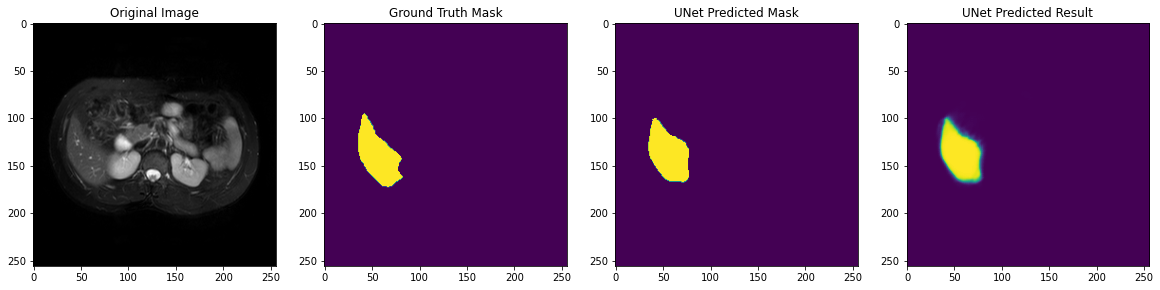

In [ ]:
# Look at data and output
plot_sample(x_test, llab_test, llab_mask , llab_pred, ix=20)

In [ ]:
def plot_result(x, l,rk,lk,s,label, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    fig, ax = plt.subplots(1, 6, figsize=(20, 10))
    ax[0].imshow(x[ix, ..., 0], cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(tf.squeeze(l)[ix])
    ax[1].set_title('Liver Mask')
    ax[2].imshow(tf.squeeze(rk[ix]))
    ax[2].set_title('Right Kidney Mask')
    ax[3].imshow(tf.squeeze(lk[ix]))
    ax[3].set_title('Left Kidney Mask')
    ax[4].imshow(tf.squeeze(s[ix]))
    ax[4].set_title('Spleen Mask')
    ax[5].imshow(label_test[ix])
    ax[5].set_title('Original Label')

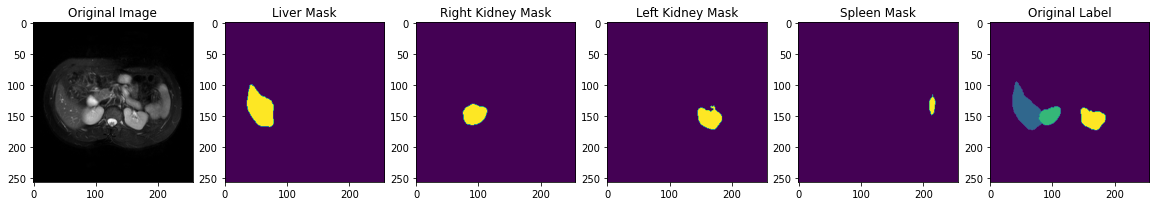

In [ ]:
plot_result(x_test, llab_mask, rklab_mask , lklab_mask,slab_mask,label_test, ix=20)

In [ ]:
def summask(l,rk,lk,s):
  summask = np.zeros(l.shape)
  summask[l==1] = 63
  summask[rk==1] = 126
  summask[lk==1] = 189
  summask[s==1] = 252
  return summask


In [ ]:
total = summask(llab_mask, rklab_mask , lklab_mask,slab_mask)


In [ ]:
total.shape

(125, 256, 256, 1)

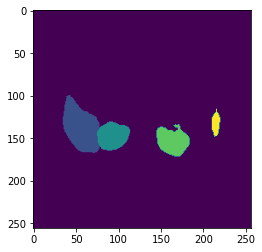

In [ ]:
plt.imshow(tf.squeeze(total[20]))

In [ ]:
def mask_compare(x,mask,label,ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(x[ix, ..., 0], cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(tf.squeeze(mask)[ix])
    ax[1].set_title('Predicted Segmentation')
    ax[2].imshow(label[ix])
    ax[2].set_title('Label')


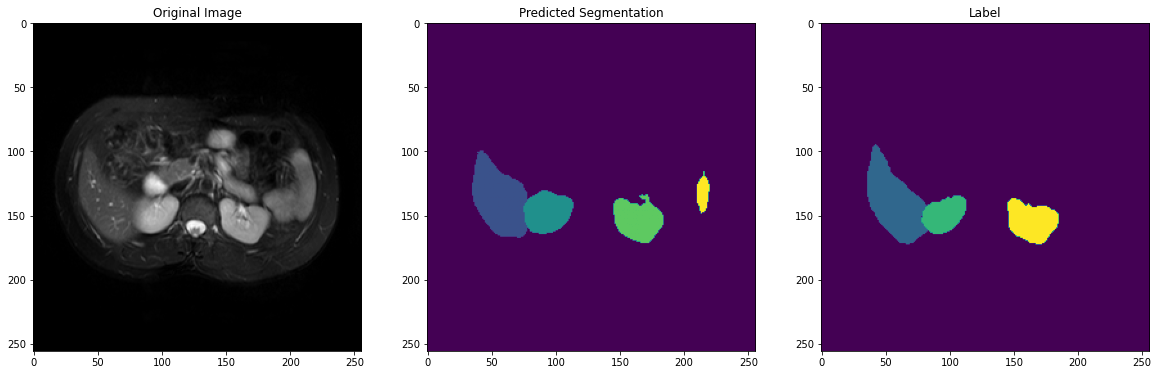

In [ ]:
mask_compare(x_test,total,label_test, ix=20)

In [ ]:
def count(pred,label):
  shape = pred.shape
  tpcount = 0
  tncount = 0
  fncount = 0
  fpcount = 0
  for i in range (0,shape[0]):
    for j in range (0,shape[1]):
      for k in range (0,shape[2]):
        if pred[i,j,k]==label[i,j,k] and label[i,j,k] ==0:
          tncount = tncount +1
        if pred[i,j,k]==label[i,j,k] and label[i,j,k] !=0:
          tpcount = tpcount+1
        if pred[i,j,k]!=label[i,j,k] and label[i,j,k] ==0:
          fncount = fncount+1
        if pred[i,j,k]!=label[i,j,k] and label[i,j,k] !=0:
          fpcount = fpcount+1
  return tncount,tpcount,fncount,fpcount
 

In [ ]:
[tn,tp,fn,fp] = count(total,label_test)

In [ ]:
# res_accuracy = (tn+tp)/total.size
# res_precision = tp/(tp+fp)
# res_recal = tp/(tp+fn)
# res_f1 = 2*res_precision*res_recal/(res_precision+res_recal)

pa = (tn+tp)/total.size
cpa = tp/(tp+fp)
IoU = tp/(tp+fn+fp)
dice = 2*tp/(2*tp+fn+fp)

In [ ]:
#print(res_accuracy,res_precision,res_recal,res_f1)
print(pa,cpa,IoU,dice)

0.981588134765625 0.7629205127083425 0.69811177250001 0.8222212269010176


In [ ]:
def show_result(total,label_test):
  [tn,tp,fn,fp] = count(total,label_test)
  res_accuracy = (tn+tp)/total.size
  res_precision = tp/(tp+fp)
  res_recal = tp/(tp+fn)
  res_f1 = 2*res_precision*res_recal/(res_precision+res_recal)
  print(res_accuracy,res_precision,res_recal,res_f1)

